In [2]:
import pandas_datareader as pdr

In [3]:
## getting the API data from tiingo website for apple company stock
df = pdr.get_data_tiingo("AAPL",api_key='811af50c85405de13fe239a349038b0b9d8b044b')

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv("AAPL.csv")

In [5]:
import pandas as pd

In [6]:
df2=pd.read_csv('AAPL.csv')

In [7]:
df2.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-04-04 00:00:00+00:00,144.77,144.8900,143.17,143.25,19891354,34.166274,34.194594,33.788668,33.807548,79565416,0.0,1.0
1,AAPL,2017-04-05 00:00:00+00:00,144.02,145.4600,143.81,144.22,27717854,33.989271,34.329117,33.939710,34.036472,110871416,0.0,1.0
2,AAPL,2017-04-06 00:00:00+00:00,143.66,144.5200,143.45,144.29,21149034,33.904310,34.107273,33.854749,34.052992,84596136,0.0,1.0
3,AAPL,2017-04-07 00:00:00+00:00,143.34,144.1800,143.27,143.73,16658543,33.828788,34.027032,33.812268,33.920830,66634172,0.0,1.0
4,AAPL,2017-04-10 00:00:00+00:00,143.17,143.8792,142.90,143.60,18933397,33.788668,33.956042,33.724947,33.890149,75733588,0.0,1.0


In [8]:
df2=df2.reset_index()['close']

In [9]:
df2.head()

0    144.77
1    144.02
2    143.66
3    143.34
4    143.17
Name: close, dtype: float64

In [10]:
import matplotlib.pyplot as plt

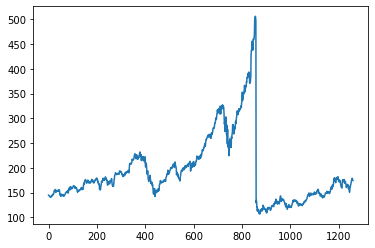

In [11]:
## plot the stock close price
plt.plot(df2)

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scalar= MinMaxScaler(feature_range=(0,1))
df1=scalar.fit_transform(np.array(df2).reshape(-1,1))

In [14]:
## Train test split
## To perform the train test split for a time series data we need to pick the first series of data as train and next series of data as test

train_size=int(len(df1)*0.65)
train_df,test_df= df1[0:train_size,:],df1[train_size:len(df1),:1]


In [15]:
print(len(df1),len(train_df),len(test_df))

1259 818 441


In [16]:
train_df

array([[0.09500313],
       [0.09312461],
       [0.09222292],
       [0.09142142],
       [0.09099562],
       [0.08713838],
       [0.08756418],
       [0.08568566],
       [0.08763932],
       [0.08606137],
       [0.08475892],
       [0.08916719],
       [0.08874139],
       [0.09217282],
       [0.094402  ],
       [0.09227301],
       [0.09254853],
       [0.09219787],
       [0.09953663],
       [0.101866  ],
       [0.10073889],
       [0.0994114 ],
       [0.10549781],
       [0.11564183],
       [0.11809643],
       [0.116268  ],
       [0.11799624],
       [0.12338134],
       [0.12237946],
       [0.12180338],
       [0.10872887],
       [0.11446462],
       [0.11576706],
       [0.11809643],
       [0.11762054],
       [0.11646838],
       [0.11779587],
       [0.11714465],
       [0.11729493],
       [0.11501565],
       [0.11606763],
       [0.12175329],
       [0.11794615],
       [0.11924859],
       [0.12155291],
       [0.12060113],
       [0.1055479 ],
       [0.096

In [1]:
## 120 130 125 140 135      160 190 187
## pick timesetp considering here 3

##  X_train   Y_train
##f1  f2  f3  y(o/p)
##120 130 125 140


In [25]:
def data_clean(time_step,data):
    datax,datay= [], []
    for i in range(len(data)-time_step-1):
        a=data[i:i+time_step,0]
        datax.append(a)
        datay.append(data[i+time_step,0])

    return np.array(datax),np.array(datay)


In [29]:
timeStep=100
X_train,y_train=data_clean(timeStep,train_df)
X_test,y_test=data_clean(timeStep,test_df)

In [30]:
X_train.shape

(717, 100)

In [31]:
y_train.shape

(717,)

In [33]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)

In [34]:
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [44]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_16 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 515ms/step - loss: 0.0288 - val_loss: 0.0055
Epoch 2/100
12/12 [==============================] - 3s 290ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 3/100
12/12 [==============================] - 4s 289ms/step - loss: 0.0020 - val_loss: 9.5307e-04
Epoch 4/100
12/12 [==============================] - 4s 344ms/step - loss: 0.0011 - val_loss: 2.8084e-04
Epoch 5/100
12/12 [==============================] - 4s 308ms/step - loss: 0.0013 - val_loss: 2.9710e-04
Epoch 6/100
12/12 [==============================] - 3s 277ms/step - loss: 0.0010 - val_loss: 2.8747e-04
Epoch 7/100
12/12 [==============================] - 3s 255ms/step - loss: 9.8943e-04 - val_loss: 3.4893e-04
Epoch 8/100
12/12 [==============================] - 3s 275ms/step - loss: 8.8626e-04 - val_loss: 3.0355e-04
Epoch 9/100
12/12 [==============================] - 3s 257ms/step - loss: 8.3287e-04 - val_loss: 2.5181e-04
Epoch 10/100
12/12 [==============================]

In [47]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [48]:
train_predict=scalar.inverse_transform(train_predict)
test_predict=scalar.inverse_transform(test_predict)

In [49]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

219.73724582379342

In [50]:
math.sqrt(mean_squared_error(y_test,test_predict))

146.7618277412878

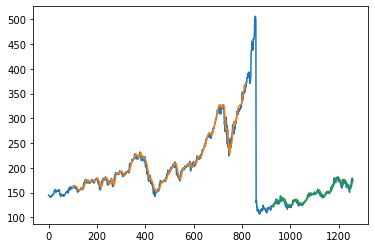

In [53]:
look_back=100
trainpredictplot=np.empty_like(df1)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back] =train_predict

testpredictplot=np.empty_like(df1)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] =test_predict

plt.plot(scalar.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [57]:
future_data=test_df[341:]

In [61]:
future_data=future_data.reshape(1,-1)

In [62]:
future_data.shape

(1, 100)

In [63]:
temp_input = list(future_data)
temp_input = temp_input[0].tolist()

In [114]:
n_step=100
i=0
lst_output=[]
while(i<30):
    if(len(future_data)>100):
        future_data=np.array(temp_input[1:])
        future_data=future_data.reshape(1,-1)
        future_data=future_data.reshape((1,n_step,1))
        yhat=model.predict(future_data)
        lst_output.extend(yhat[0].tolist())
        lst_output.extend(yhat[0])
        i=i+1
    
    else:
        future_data=future_data.reshape((1,n_step,1))
        yhat=model.predict(future_data)
        lst_output.extend(yhat[0].tolist())
        lst_output.extend(yhat[0])
        i=i+1



In [115]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

df3= df1.tolist()
df3=df3.extend(lst_output)


In [93]:
lst_output=np.array(lst_output).reshape(1,-1)

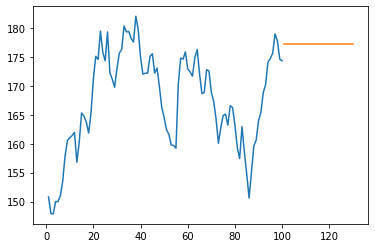

In [140]:

plt.plot(day_new, scalar.inverse_transform(df1[1159:]))
plt.plot(day_pred, scalar.inverse_transform(np.array(lst_output[:30]).reshape(-1,1)) )